In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
data=pd.read_csv('datam.csv' ,encoding="ISO-8859-1")

C:\Users\rz503\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
5,152,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.4,25.7,NaN,NaN,NaN,NaN,1990-03-01
6,150,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",5.4,17.1,NaN,NaN,NaN,NaN,1990-04-01
7,151,April - M041990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,8.7,NaN,NaN,NaN,NaN,1990-04-01
8,152,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.2,23.0,NaN,NaN,NaN,NaN,1990-04-01
9,151,May - M051990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.0,8.9,NaN,NaN,NaN,NaN,1990-05-01


In [4]:
data.fillna(0,inplace=True)
data.tail()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,0.0,"Inside Rampal Industries,ULUBERIA",0.0,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,0.0,"Inside Rampal Industries,ULUBERIA",0.0,2015-12-29
435739,0,0,andaman-and-nicobar-islands,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0
435740,0,0,Lakshadweep,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0
435741,0,0,Tripura,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0


In [5]:
def calculate_si(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    if (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    if (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    if (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/800)
    if (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    if (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
data['si']=data['so2'].apply(calculate_si)
df= data[['so2','si']]
df.head()

,so2,si
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


In [6]:
def calculate_ni(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-14)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
data['ni']=data['no2'].apply(calculate_ni)
df= data[['no2','ni']]
df.head()

,no2,ni
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


In [7]:
def calculate_(rspm):
    rpi=0
    if(rpi<=30):
     rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
     rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
     rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
     rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=400+(rpi-250)*(100/130)
    return rpi
data['rpi']=data['rspm'].apply(calculate_si)
df= data[['rspm','rpi']]
df.tail()

,rspm,rpi
435737,143.0,121.000000
435738,171.0,130.333333
435739,0.0,0.000000
435740,0.0,0.000000
435741,0.0,0.000000


In [8]:
def calculate_spi(spm):
    spi=0
    if(spm<=50):
     spi=spm
    if(spm<50 and spm<=100):
     spi=spm
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)
    elif(spm>350 and spm<=450):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/80)
    return spi
data['spi']=data['spm'].apply(calculate_spi)
df= data[['spm','spi']]
df.tail()

,spm,spi
435737,0.0,0.0
435738,0.0,0.0
435739,0.0,0.0
435740,0.0,0.0
435741,0.0,0.0


In [9]:
def calculate_aqi(si,ni,spi,rpi):
    aqi=0
    if(si>ni and si>spi and si>rpi):
     aqi=si
    if(spi>si and spi>ni and spi>rpi):
     aqi=spi
    if(ni>si and ni>spi and ni>rpi):
     aqi=ni
    if(rpi>si and rpi>ni and rpi>spi):
     aqi=rpi
    return aqi
data['AQI']=data.apply(lambda x:calculate_aqi(x['si'],x['ni'],x['spi'],x['rpi']),axis=1)
df= data[['sampling_date','state','location','si','ni','rpi','spi','AQI']]
df.head()

,sampling_date,state,location,si,ni,rpi,spi,AQI
0,February - M021990,Andhra Pradesh,Hyderabad,6.000,21.750,0.0,0.0,21.750
1,February - M021990,Andhra Pradesh,Hyderabad,3.875,8.750,0.0,0.0,8.750
2,February - M021990,Andhra Pradesh,Hyderabad,7.750,35.625,0.0,0.0,35.625
3,March - M031990,Andhra Pradesh,Hyderabad,7.875,18.375,0.0,0.0,18.375
4,March - M031990,Andhra Pradesh,Hyderabad,5.875,9.375,0.0,0.0,9.375


In [10]:
loc,dat,aqi=[data['location'],data['date'],data['AQI']]
df=[[],[]]
for i in range(len(loc)):
    if loc[i]=='Hyderabad':
        df[0].append(dat[i])
        df[1].append(aqi[i])
        #df.append(loc[i],dat[i])
df[0]=pd.to_datetime(df[0])


In [11]:
df
df_new=pd.DataFrame(df,dtype=float)
df_new=df_new.transpose()
df_new.rename(columns={0:'date',1:'AQI'}, inplace=True)

In [12]:

pk=df_new
pk=pk.set_index('date')

In [14]:
pk["AQI"] = pd.to_numeric(pk["AQI"])

In [15]:
pk=pk.resample('MS')["AQI"].mean()

In [17]:
pk.index

DatetimeIndex(['1990-02-01', '1990-03-01', '1990-04-01', '1990-05-01',
               '1990-06-01', '1990-07-01', '1990-08-01', '1990-09-01',
               '1990-10-01', '1990-11-01',
               ...
               '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01',
               '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
               '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', name='date', length=311, freq='MS')

In [18]:
pk.head()

date
1990-02-01    22.041667
1990-03-01    19.958333
1990-04-01    20.333333
1990-05-01    17.187500
1990-06-01    81.361111
Freq: MS, Name: AQI, dtype: float64

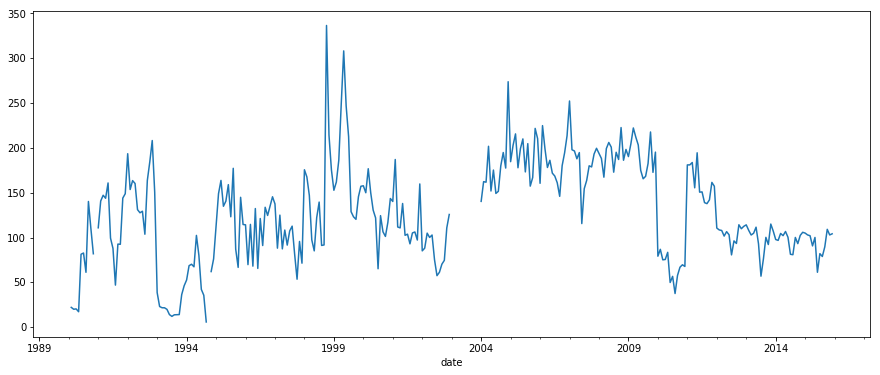

In [19]:
pk.sort_values(ascending=False)
pk.plot(figsize=(15,6))

In [20]:
pk

date
1990-02-01     22.041667
1990-03-01     19.958333
1990-04-01     20.333333
1990-05-01     17.187500
1990-06-01     81.361111
1990-07-01     82.694444
1990-08-01     61.180556
1990-09-01    140.222222
1990-10-01    110.138889
1990-11-01     81.875000
1990-12-01           NaN
1991-01-01    110.847222
1991-02-01    140.722222
1991-03-01    147.166667
1991-04-01    143.819444
1991-05-01    160.888889
1991-06-01     99.347222
1991-07-01     87.833333
1991-08-01     46.888889
1991-09-01     92.652778
1991-10-01     92.458333
1991-11-01    144.000000
1991-12-01    148.888889
1992-01-01    193.513889
1992-02-01    153.555556
1992-03-01    163.500000
1992-04-01    160.266667
1992-05-01    131.111111
1992-06-01    127.604167
1992-07-01    129.333333
                 ...    
2013-07-01     56.858796
2013-08-01     76.211623
2013-09-01    100.186343
2013-10-01     92.177928
2013-11-01    115.019841
2013-12-01    107.153509
2014-01-01     97.757862
2014-02-01     96.801724
2014-03-01    104.55

In [21]:
dc=pd.DataFrame(pk)

In [22]:
p=dc['AQI'].mean()
p

127.74802906471142

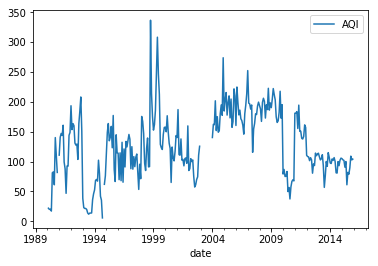

In [23]:

dc.plot()

In [25]:
df1=pd.DataFrame(pk)

In [26]:
df1.fillna(127.74802906471142,inplace=True)

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 311 entries, 1990-02-01 to 2015-12-01
Freq: MS
Data columns (total 1 columns):
AQI    311 non-null float64
dtypes: float64(1)
memory usage: 4.9 KB


In [28]:
train_data=df1.iloc[:263]
test_data=df1.iloc[263:]

In [29]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [30]:
fitted_model= ExponentialSmoothing(train_data['AQI'],
                                  trend='mul',
                                  seasonal='mul',
                                  seasonal_periods=12).fit()

In [31]:
test_predictions=fitted_model.forecast(48)

In [32]:
fitted_model

In [33]:
test_predictions

2012-01-01    207.166037
2012-02-01    156.551940
2012-03-01    124.919423
2012-04-01     90.358465
2012-05-01     71.225358
2012-06-01     44.682342
2012-07-01     42.694353
2012-08-01     39.942255
2012-09-01     45.424840
2012-10-01     58.991337
2012-11-01     78.457624
2012-12-01    108.596304
2013-01-01    132.483681
2013-02-01    100.115722
2013-03-01     79.886574
2013-04-01     57.784675
2013-05-01     45.548960
2013-06-01     28.574573
2013-07-01     27.303245
2013-08-01     25.543265
2013-09-01     29.049404
2013-10-01     37.725245
2013-11-01     50.174029
2013-12-01     69.447860
2014-01-01     84.723953
2014-02-01     64.024487
2014-03-01     51.087850
2014-04-01     36.953579
2014-05-01     29.128780
2014-06-01     18.273577
2014-07-01     17.460557
2014-08-01     16.335041
2014-09-01     18.577234
2014-10-01     24.125476
2014-11-01     32.086534
2014-12-01     44.412242
2015-01-01     54.181377
2015-02-01     40.943969
2015-03-01     32.670927
2015-04-01     23.631992


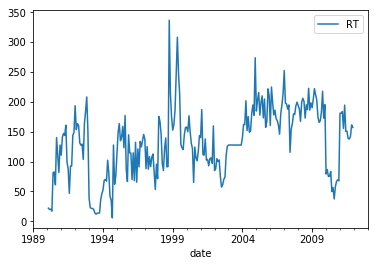

In [34]:
train_data['AQI'].plot(legend=True,label='RT')

df1 

In [138]:
df1

,AQI
date,
1990-02-01,22.041667
1990-03-01,19.958333
1990-04-01,20.333333
1990-05-01,17.187500
1990-06-01,81.361111
1990-07-01,82.694444
1990-08-01,61.180556
1990-09-01,140.222222
1990-10-01,110.138889


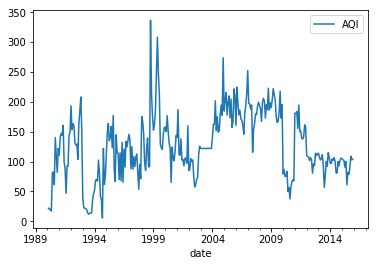

In [207]:
df1.plot()

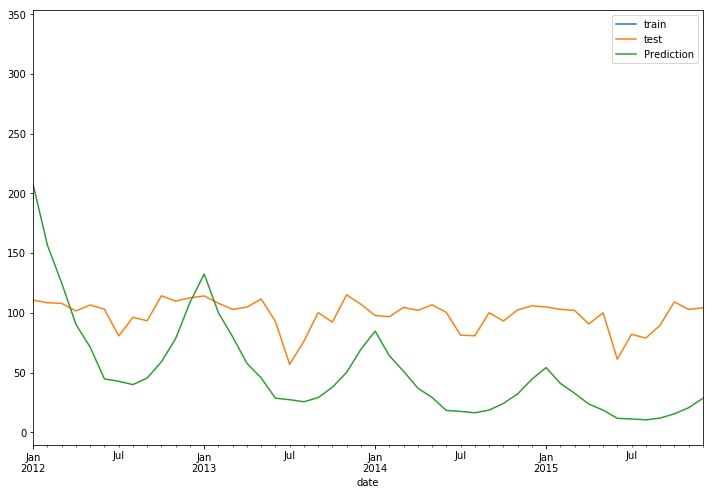

In [35]:
train_data['AQI'].plot(legend=True,label="train",figsize=(12,8))
test_data['AQI'].plot(legend=True,label='test')
test_predictions.plot(legend=True,label='Prediction',xlim=['2012-01-01','2015-12-01'])

In [36]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [37]:
test_data.describe()

,AQI
count,48.000000
mean,98.475271
std,12.905446
min,56.858796
25%,93.097770
50%,102.241056
75%,106.828248
max,115.019841


In [38]:
import math
math.sqrt(mean_squared_error(test_data,test_predictions))

59.10327119850545

In [39]:
len(test_data)

48

In [40]:
len(test_predictions)

48

In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 311 entries, 1990-02-01 to 2015-12-01
Freq: MS
Data columns (total 1 columns):
AQI    311 non-null float64
dtypes: float64(1)
memory usage: 4.9 KB


In [42]:
final_model=ExponentialSmoothing(df1["AQI"],trend='mul',seasonal='mul'
                                    ,seasonal_periods=12).fit()

In [43]:
forecast_pred=final_model.forecast(12)

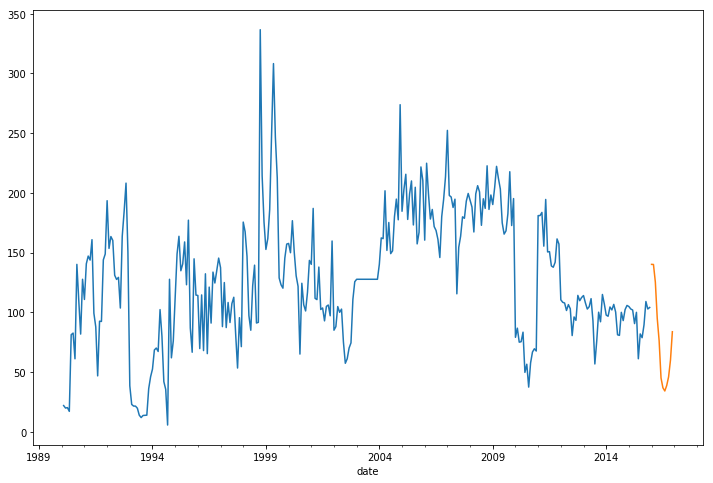

In [44]:
df1['AQI'].plot(figsize=(12,8))
forecast_pred.plot()